# pandas 데이터 합치기

- pandas는 두 개 이상의 데이터 프레임을 하나로 합치는
- **병합(merge)**이나 **연결(concate)**을 지원
- merge(), join(), concat()

In [1]:
# 필요 모듈
import pandas as pd
import numpy as np
import random

In [2]:
# 여러 변수 출력 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

## 1. 데이터 병합

### 1) merge() 명령을 이용한 데이터 프레임 병합

- **merge** : 
    - 두 데이터 프레임의 공통 열(column)이나 인덱스(index)를 기준으로 합침
    - **key** : 기준이 되는 열 데이터
    
#### A. 형식
- df.merge(df1) : 두 df를 병합시켜 준다.
- 기본은 inner join : 양쪽에 동일하게 존재하는 키만 표시
- key : 기준열을 의미
    -  실제 데이터 필드거나 행 인덱스 일 수 있다.
- 병합방식
    - inner join :  양쪽 df에서 모두 키가 존재하는 data만표시
    - outer join :  한쪽에만 키가 존재하면 data를 표시
    - 병합방식을 설정 : how=inner(생략가능), how=outer 

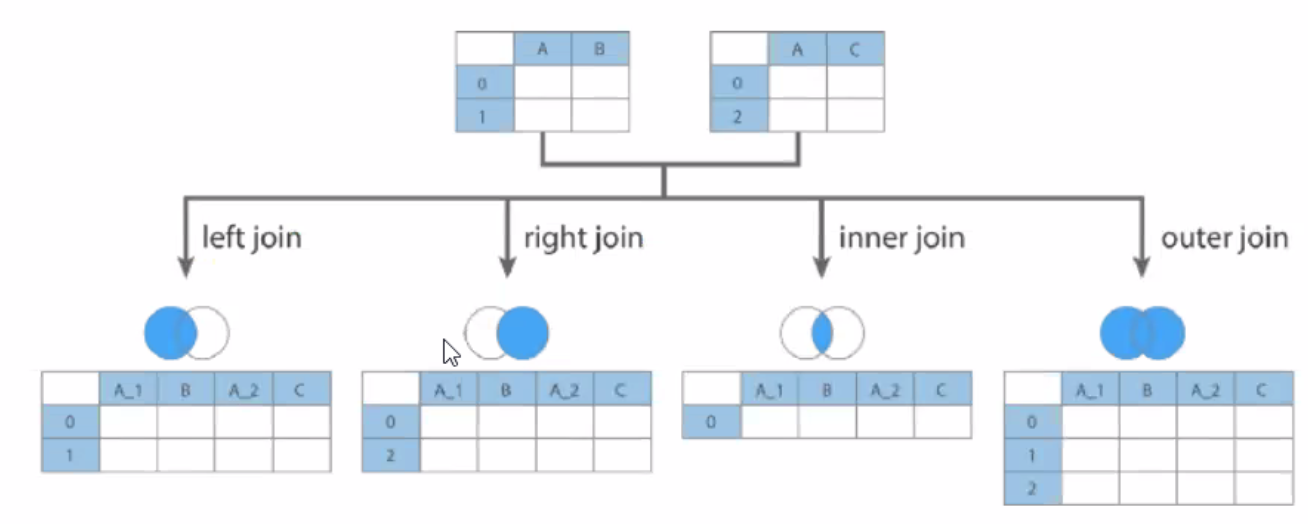

**예제1. 데이터프레임 생성**

- 고객 정보를 담고 있는 데이터 프레임

In [6]:
# 예시 df 생성 - 고객 정보를 담고 있는 df
df1 = pd.DataFrame({'고객번호':[1001,1002,1003,1004,1005,1006,1007],
                   '이름': ['둘리','도우너','또치','길동','희동','마이콜','영희']},
                  columns = ['고객번호','이름']) # 없어도 됨 
df1

,고객번호,이름
0,1001,둘리
1,1002,도우너
2,1003,또치
3,1004,길동
4,1005,희동
5,1006,마이콜
6,1007,영희


- 예금 정보 데이터 프레임

In [7]:
# 예제 df 생성 - 예금 정보 df
df2 = pd.DataFrame({'고객번호':[1001,1001,1005,1006,1008,1001],
                   '금액': [10000,20000,15000,5000,100000,30000]},
                  columns = ['고객번호','금액']) # 없어도 됨 
df2

,고객번호,금액
0,1001,10000
1,1001,20000
2,1005,15000
3,1006,5000
4,1008,100000
5,1001,30000


**merge 명령으로 두 df를 병합하는 문법**

형식 : **merge(df1, df2, how, on, left_on, right_on, left_index, right_index)**
- 모든 인수 생략(병합 df를 제외한) 공통 이름을 갖고 있는 열
- '고객번호'가 키가 됨
- 양쪽에 모두 존재하는 키의 data만 보여주는 **`inner join`** 방식을 사용
    - pandas.merge(df1, df2)
    - df1.merge(df2)

In [8]:
df1.head(1)
df2.head(1)

,고객번호,이름
0,1001,둘리


,고객번호,금액
0,1001,10000


**데이터프레임1.merge(데이터프레임2)**
- 기준 데이터프레임은 df1

In [11]:
df1.merge(df2) # 방법 1

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1001,둘리,30000
3,1005,희동,15000
4,1006,마이콜,5000


,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1001,둘리,30000
3,1005,희동,15000
4,1006,마이콜,5000


**pandas.merge(데이터프레임1, 데이터프레임2)**
- 기준데이터 프레임은 왼쪽에

In [12]:
# 기준 데이터 프레임  : 왼쪽에 나타남
# 기준 데이터 프레임 : df1
pd.merge(df1,df2) # 방법 2

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1001,둘리,30000
3,1005,희동,15000
4,1006,마이콜,5000


In [13]:
# 기준 데이터 프레임 : df2
pd.merge(df2,df1)

,고객번호,금액,이름
0,1001,10000,둘리
1,1001,20000,둘리
2,1001,30000,둘리
3,1005,15000,희동
4,1006,5000,마이콜


#### B. how 인수를 사용한 다양한 병합

**merge( , how = 'outer')**
- how = inner/outer/left/right
    - how=left : 왼쪽 df에 있는 모든 키의 데이터는 표시
    - how=right : 오른쪽 df 에 있는 모든 키의 데이터는 표시

- outer join
    - 키 값이 한쪽에만 있어도 데이터를 보여 줌
    - 어느 한 df에 데이터가 존재하지 않으면 NaN으로 표시됨

In [14]:
pd.merge(df1,df2,how='outer') # 모든 데이터를 다 합침

,고객번호,이름,금액
0,1001,둘리,10000.0
1,1001,둘리,20000.0
2,1001,둘리,30000.0
3,1002,도우너,NaN
4,1003,또치,NaN
5,1004,길동,NaN
6,1005,희동,15000.0
7,1006,마이콜,5000.0
8,1007,영희,NaN
9,1008,NaN,100000.0


- left join

In [15]:
pd.merge(df1,df2,how='left') # 왼쪽 기준데이터프레임에 있는 값으로만 merge

,고객번호,이름,금액
0,1001,둘리,10000.0
1,1001,둘리,20000.0
2,1001,둘리,30000.0
3,1002,도우너,NaN
4,1003,또치,NaN
5,1004,길동,NaN
6,1005,희동,15000.0
7,1006,마이콜,5000.0
8,1007,영희,NaN


- right join

In [16]:
pd.merge(df1,df2,how='right') # 오른쪽 기준데이터프레임에 있는 값으로만 merge

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1005,희동,15000
3,1006,마이콜,5000
4,1008,NaN,100000
5,1001,둘리,30000


#### C. 동일한 키 값이 있는 경우

- 키값이 같은 데이터가 여러개 있는 경우에는 있을 수 있는 모든 경우의 수를 따져서 조합을 만들어 낸다.

**예제2. 데이터프레임 생성**

- 데이터프레임1 

In [17]:
# 예제 df 생성 
# 열: 품종, 꽃잎길이
df1 = pd.DataFrame({
    '품종':['setosa','setosa','virginica','virginica'],
    '꽃잎길이':[1.4, 1.3, 1.5, 1.3]},
    columns=['품종','꽃잎길이'])
df1

,품종,꽃잎길이
0,setosa,1.4
1,setosa,1.3
2,virginica,1.5
3,virginica,1.3


- 데이터프레임2

In [21]:
# 열 : 품종, 꽃잎너비
df2 = pd.DataFrame({
    '품종': ['setosa','virginica','virginica','Versicolor'],
    '꽃잎너비':[0.4,0.3,0.5,0.3]},
    columns=['품종','꽃잎너비'])
df2

,품종,꽃잎너비
0,setosa,0.4
1,virginica,0.3
2,virginica,0.5
3,Versicolor,0.3


- df1과 df2 를 병합


    - 위 데이터에서 키 값 setosa에 대해
        - df1에는 1.4와 1.3 2개의 데이터가 있고
        - df2에는 0.4라는 1개의 데이터가 있으므로
        - 병합 데이터에는 setosa가 (1.4,0.4)(1.3,0.4)의 2 경우가 표현된다.
        

    - 키값 virginica의 경우에는 df1에 2개 df2에 2개의 데이터가 있으므로
        - 2개와 2개의 조합에 의해 4개의 데이터가 표현된다.

In [22]:
df1
df2

,품종,꽃잎길이
0,setosa,1.4
1,setosa,1.3
2,virginica,1.5
3,virginica,1.3


,품종,꽃잎너비
0,setosa,0.4
1,virginica,0.3
2,virginica,0.5
3,Versicolor,0.3


In [26]:
#양쪽 데이터프레임에서 공통된 키만 표현

df1.head(1)
df2.head(2)
pd.merge(df1,df2)
pd.merge(df1,df2,how = 'left')
pd.merge(df1,df2,how = 'right')
pd.merge(df1,df2,how = 'outer')

,품종,꽃잎길이
0,setosa,1.4


,품종,꽃잎너비
0,setosa,0.4
1,virginica,0.3


,품종,꽃잎길이,꽃잎너비
0,setosa,1.4,0.4
1,setosa,1.3,0.4
2,virginica,1.5,0.3
3,virginica,1.5,0.5
4,virginica,1.3,0.3
5,virginica,1.3,0.5


,품종,꽃잎길이,꽃잎너비
0,setosa,1.4,0.4
1,setosa,1.3,0.4
2,virginica,1.5,0.3
3,virginica,1.5,0.5
4,virginica,1.3,0.3
5,virginica,1.3,0.5


,품종,꽃잎길이,꽃잎너비
0,setosa,1.4,0.4
1,setosa,1.3,0.4
2,virginica,1.5,0.3
3,virginica,1.3,0.3
4,virginica,1.5,0.5
5,virginica,1.3,0.5
6,Versicolor,NaN,0.3


,품종,꽃잎길이,꽃잎너비
0,setosa,1.4,0.4
1,setosa,1.3,0.4
2,virginica,1.5,0.3
3,virginica,1.5,0.5
4,virginica,1.3,0.3
5,virginica,1.3,0.5
6,Versicolor,NaN,0.3


#### D. merge()의 on 인수를 사용하여 기준열 명시하여 병합

**key**
- 두 데이터 프레임에서 이름이 같은 열은 모두 키가 될 수 있다.
- 열이름이 같아도 키로 사용할 수 없는 열이 있으면 **on 인수로 기준열을 명시**해야 한다.

**예제3.**

In [37]:
# 예제 df
df1 = pd.DataFrame({
    '고객명':['춘향','춘향','몽룡'],
    '날짜' : ['2018-01-01','2018-01-02','2018-01-01'],
    '데이터':[20000, 30000, 100000]
})
df1

,고객명,날짜,데이터
0,춘향,2018-01-01,20000
1,춘향,2018-01-02,30000
2,몽룡,2018-01-01,100000


In [38]:
df2 = pd.DataFrame({
    '고객명':['춘향','몽룡'],
#     '성별':['여자','남자']
    '데이터':['여자','남자']
})
df2

,고객명,성별
0,춘향,여자
1,몽룡,남자


**기준열을 직접 지정 : on=기준열 이름**
- 반환 결과에 동일 필드명이 있을 경우에는 필드명_x, 필드명_y로 필드명을 변경해서 표현

In [40]:
pd.merge(df1,df2)
pd.merge(df1,df2,on='고객명')

,고객명,날짜,데이터,성별
0,춘향,2018-01-01,20000,여자
1,춘향,2018-01-02,30000,여자
2,몽룡,2018-01-01,100000,남자


,고객명,날짜,데이터,성별
0,춘향,2018-01-01,20000,여자
1,춘향,2018-01-02,30000,여자
2,몽룡,2018-01-01,100000,남자


**키가 되는 기준열 이름이 두 데이터 프레임에서 다르게 나타나는 경우**
- **left_on, right_on 인수**를 사용해서 기준열을 명시해야 함

**예제4.**

In [45]:
df1=pd.DataFrame({
    '이름' :['영희','철수','철수'],
    '성적' :[90,80,80]
})
df2 = pd.DataFrame({
    '성명' :['영희','영희','철수'],
    '성적2':[100,80,90]
})
df1.head(1)
df2.head(1)
df1
df2

,이름,성적
0,영희,90


,성명,성적2
0,영희,100


,이름,성적
0,영희,90
1,철수,80
2,철수,80


,성명,성적2
0,영희,100
1,영희,80
2,철수,90


In [44]:
# 양쪽에서 기준이되는 열의 이름이 다르기 때문에 on인수를 두번사용
# 출력결과는 양쪽 필드 명이 다르기 때문에 기준열이 모두나타난다.
pd.merge(df1,df2,left_on = '이름',right_on = '성명')

,이름,성적,성명,성적2
0,영희,90,영희,100
1,영희,90,영희,80
2,철수,80,철수,90
3,철수,80,철수,90


#### E) 인덱스 기준으로 병합

: 일반 데이터 열이 아닌 인덱스를 기준으로 merge 할수도 있음


- 인덱스를 기준열로 사용하려면
    - left_index = True 또는
    - right_index = True 설정을 하게 됨

**예제5. 데이터프레임의 인덱스를 기준열로 사용하는 경우**

In [46]:
df1 = pd.DataFrame({
    '도시': ['서울','서울','서울','부산','부산'],
    '연도': [2000, 2005, 2010, 2000, 2005],
    '인구': [9853972, 9762546, 9631482, 3655437, 3512547]    
})

df2=pd.DataFrame(
    np.arange(12).reshape((6,2)),
    index=[['부산','부산','서울','서울','서울','서울'], # multi_index : 다차원 인덱스
          [2000, 2005, 2000, 2005, 2010, 2015]],
    columns=['데이터1','데이터2']
)

df1
df2

,도시,연도,인구
0,서울,2000,9853972
1,서울,2005,9762546
2,서울,2010,9631482
3,부산,2000,3655437
4,부산,2005,3512547


데이터1  데이터2
부산 2000     0     1
   2005     2     3
서울 2000     4     5
   2005     6     7
   2010     8     9
   2015    10    11

In [47]:
pd.merge(df1,df2,left_on = ['도시','연도'], right_index = True)

,도시,연도,인구,데이터1,데이터2
0,서울,2000,9853972,4,5
1,서울,2005,9762546,6,7
2,서울,2010,9631482,8,9
3,부산,2000,3655437,0,1
4,부산,2005,3512547,2,3


**예제6. 두 데이터프레임의 key가 모두 인덱스인 경우**

In [48]:
df1 = pd.DataFrame([[1.,2.],[3.,4.],[5.,6.]],
                   index=['a','c','e'],
                   columns=['서울','부산'])
df1

df2=pd.DataFrame([[7.,8.],[9.,10.],
                  [11.,12.],[13.,14.]],
                 index=['b','c','d','e'],
                 columns=['대구','광주'])
df2

,서울,부산
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


,대구,광주
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


**두 데이터프레임의 인덱스가 키로 사용될 경우**

In [49]:
# 두 데이터프레임의 key가 모두 인덱스인 경우
pd.merge(df1,df2,how='outer',left_index = True, right_index = True)

,서울,부산,대구,광주
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


## 2) join()을 이용한 병합

**Dataframe1.join(Dataframe2. how='left/right/inner/outer', on=keys)**

- 사용 방법은 merge()와 동일
- 행 인덱스를 기준으로 결합

- Dataframe1.join(Dataframe2. how='left')가 default값

In [52]:
df1.join(df2, how='outer')
df1.join(df2, how='inner')
df1.join(df2, how='left')
df1.join(df2, how='right')

,서울,부산,대구,광주
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


,서울,부산,대구,광주
c,3.0,4.0,9.0,10.0
e,5.0,6.0,13.0,14.0


,서울,부산,대구,광주
a,1.0,2.0,NaN,NaN
c,3.0,4.0,9.0,10.0
e,5.0,6.0,13.0,14.0


,서울,부산,대구,광주
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


### 연습문제1.
- 두 개의 데이터프레임을 만들고 merge 명령을 병합한다.
- 단, 데이터 프레임은 다음 조건을 만족해야 한다.
    1. 각각 5X5 이상의 크기를 가진다.
    2. 공통열을 하나이상 갖는다. 
        - 다만 공통열의 이름은 서로 다르게 할 것
    3. merge의 경우를 inner, outer, left, right 4개의 형태로 출력할 것
    4. 지정된 인덱스와 컬럼명을 갖는다. 

In [189]:
data = [[22, 60.1, 170.5, '남', '서울'], 
        [45, 51.3, 157.3, '여', '부산'], 
        [22, 68.3,180.1,  '남', '대구'],
        [33, 88.3, 190.2, '남', '제주'], 
        [27, 48.3, 160.1, '여', '강릉']]

df1 = pd.DataFrame(data, 
                   index=['홍길동', '이몽룡', '성춘향','변학도','김연아'], 
                   columns=["나이", "몸무게", "키", "성별" ,"주소"])
df1

,나이,몸무게,키,성별,주소
홍길동,22,60.1,170.5,남,서울
이몽룡,45,51.3,157.3,여,부산
성춘향,22,68.3,180.1,남,대구
변학도,33,88.3,190.2,남,제주
김연아,27,48.3,160.1,여,강릉


In [190]:
data = [[22, 60.1, 170.5, '남', '서울'], 
        [45, 51.3, 157.3, '여', '부산'], 
        [22, 68.3,180.1,  '남', '울산'],
        [33, 88.3, 190.2, '남', '제주'], 
        [27, 48.3, 160.1, '여', '광주']]
df2 = pd.DataFrame(data,
                   index=[1,2,3,4,5],
                   columns=["나이", "몸무게", "키", "성별" ,"지역"])
df2

,나이,몸무게,키,성별,지역
1,22,60.1,170.5,남,서울
2,45,51.3,157.3,여,부산
3,22,68.3,180.1,남,울산
4,33,88.3,190.2,남,제주
5,27,48.3,160.1,여,광주


In [218]:
df1.head(3)
df2.head(3)

,나이,몸무게,키,성별,주소
홍길동,22,60.1,170.5,남,서울
이몽룡,45,51.3,157.3,여,부산
성춘향,22,68.3,180.1,남,대구


,나이,몸무게,키,성별,지역
1,22,60.1,170.5,남,서울
2,45,51.3,157.3,여,부산
3,22,68.3,180.1,남,울산


In [217]:
pd.merge(df1,df2,left_on = '주소',right_on = '지역')
pd.merge(df1,df2,how='outer',left_on = '주소',right_on = '지역')
pd.merge(df1,df2,how='left',left_on = '주소',right_on = '지역')
pd.merge(df1,df2,how='right',left_on = '주소',right_on = '지역')

,나이_x,몸무게_x,키_x,성별_x,주소,나이_y,몸무게_y,키_y,성별_y,지역
0,22,60.1,170.5,남,서울,22,60.1,170.5,남,서울
1,45,51.3,157.3,여,부산,45,51.3,157.3,여,부산
2,33,88.3,190.2,남,제주,33,88.3,190.2,남,제주


,나이_x,몸무게_x,키_x,성별_x,주소,나이_y,몸무게_y,키_y,성별_y,지역
0,22.0,60.1,170.5,남,서울,22.0,60.1,170.5,남,서울
1,45.0,51.3,157.3,여,부산,45.0,51.3,157.3,여,부산
2,22.0,68.3,180.1,남,대구,NaN,NaN,NaN,NaN,NaN
3,33.0,88.3,190.2,남,제주,33.0,88.3,190.2,남,제주
4,27.0,48.3,160.1,여,강릉,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,22.0,68.3,180.1,남,울산
6,NaN,NaN,NaN,NaN,NaN,27.0,48.3,160.1,여,광주


,나이_x,몸무게_x,키_x,성별_x,주소,나이_y,몸무게_y,키_y,성별_y,지역
0,22,60.1,170.5,남,서울,22.0,60.1,170.5,남,서울
1,45,51.3,157.3,여,부산,45.0,51.3,157.3,여,부산
2,22,68.3,180.1,남,대구,NaN,NaN,NaN,NaN,NaN
3,33,88.3,190.2,남,제주,33.0,88.3,190.2,남,제주
4,27,48.3,160.1,여,강릉,NaN,NaN,NaN,NaN,NaN


,나이_x,몸무게_x,키_x,성별_x,주소,나이_y,몸무게_y,키_y,성별_y,지역
0,22.0,60.1,170.5,남,서울,22,60.1,170.5,남,서울
1,45.0,51.3,157.3,여,부산,45,51.3,157.3,여,부산
2,NaN,NaN,NaN,NaN,NaN,22,68.3,180.1,남,울산
3,33.0,88.3,190.2,남,제주,33,88.3,190.2,남,제주
4,NaN,NaN,NaN,NaN,NaN,27,48.3,160.1,여,광주


------------------------------

## 2. 데이터 연결

### 1) concat() 명령을 사용한 데이터 연결

**pd.concat([left, right], axis=0, join='outer', ignore_index=False, keys=None)**

- **left, right** :  Series, DataFrame, Panel object 리스트
- **axis** :  0은 위+아래로 합치기, 1은 왼쪽+오른쪽으로 합치기
- **join** :  'outer': 합집합(union), 'inner': 교집합(intersection)
- **ignore_index** :  False: 기존 index 유지, True: 기존 index 무시
- **keys** :  계층적 index 사용하려면 keys 튜플 입력

- 기준열 없이 데이터를 합친다
- 위 아래로 데이터를 결합하는 **행 결합(row bind)**이 기본
- axis 속성을 1로 설정하면 열 결합(column bind)을 수행
- 단순히 두 시리즈나 데이터프레임을 연결하기 때문에 **인덱스 값이 중복**될 수 있다.

#### 행결합 : pd.concat([df1,df2], axis=0)

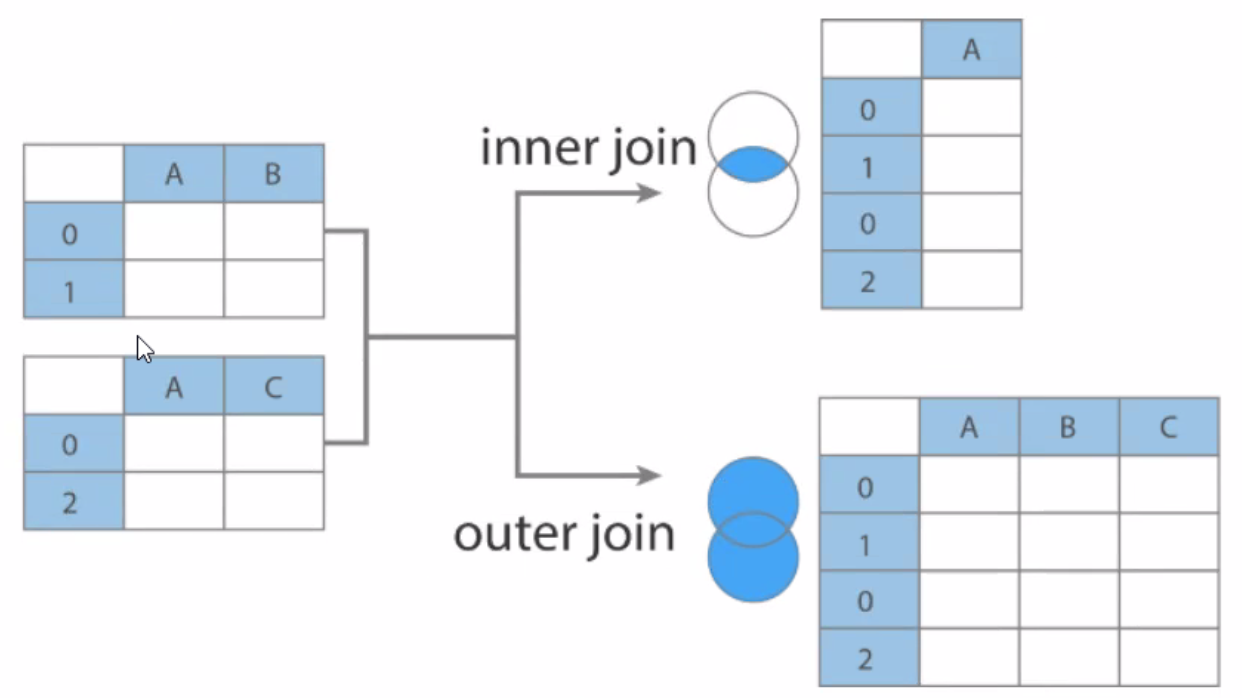

#### 열결합 :  pd.concat([df1,df2],axis=1)

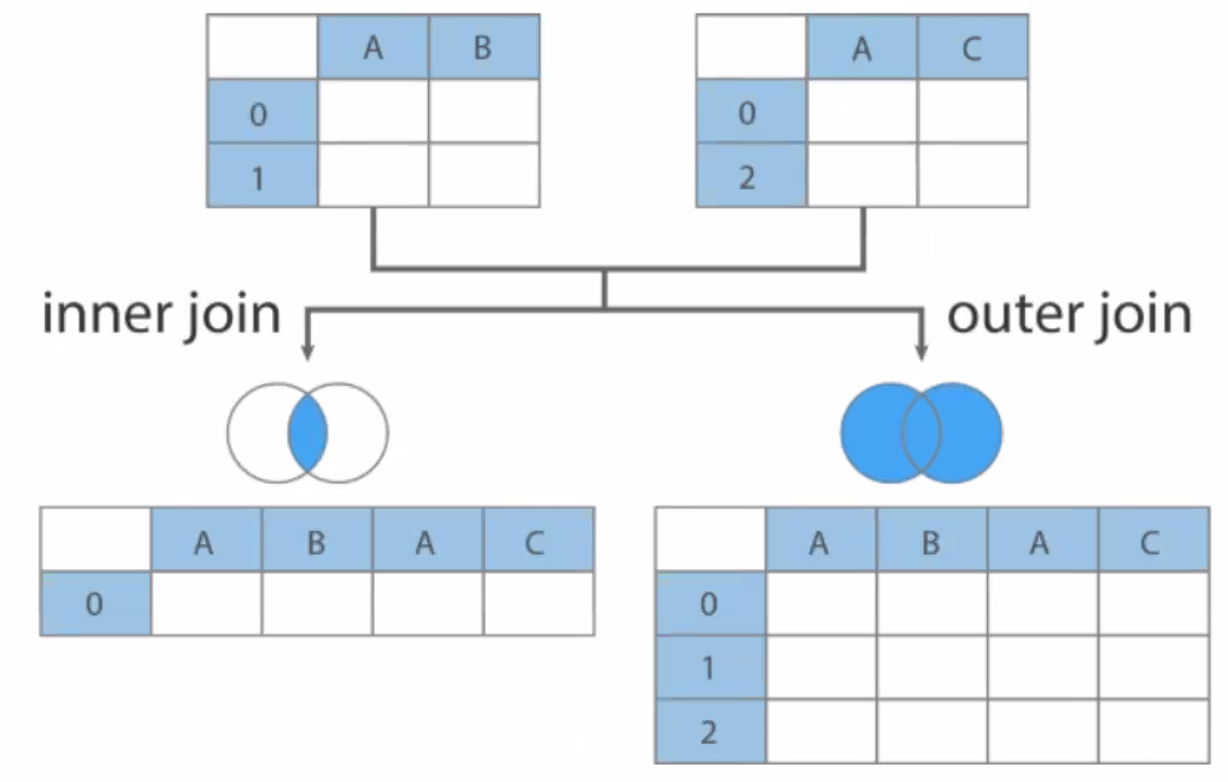


### 2) 두 시리즈 데이터 연결

**예제1.**

- 두 시리즈 데이터 생성

**pd.concat([left, right], axis=0, join='outer', ignore_index=False, keys=None)**

- left, right :  Series, DataFrame, Panel object 리스트
- axis :  0은 위+아래로 합치기, 1은 왼쪽+오른쪽으로 합치기
- join :  'outer': 합집합(union), 'inner': 교집합(intersection)
- ignore_index :  False: 기존 index 유지, True: 기존 index 무시
- keys :  계층적 index 사용하려면 keys 튜플 입력

- 기준열 없이 데이터를 합친다
- 위 아래로 데이터를 결합하는 **행 결합(row bind)**이 기본
- axis 속성을 1로 설정하면 열 결합(column bind)을 수행
- 단순히 두 시리즈나 데이터프레임을 연결하기 때문에 **인덱스 값이 중복**될 수 있다.

#### 행결합 : pd.concat([df1,df2], axis=0)

#### 열결합 :  pd.concat([df1,df2],axis=1)

- 기준열 없이 데이터를 합친다
- 위 아래로 데이터를 결합하는 **행 결합(row bind)**이 기본
- axis 속성을 1로 설정하면 열 결합(column bind)을 수행
- 단순히 두 시리즈나 데이터프레임을 연결하기 때문에 **인덱스 값이 중복**될 수 있다.

#### 행결합 : pd.concat([df1,df2], axis=0)

#### 열결합 :  pd.concat([df1,df2],axis=1)

### 2) 두 시리즈 데이터 연결

**예제1.**

- 두 시리즈 데이터 생성

In [59]:
s1 = pd.Series([0,1],index=['A','B'])
s2 = pd.Series([2,3,4], index=['A','B','C'])
s1
s2

A    0
B    1
dtype: int64

A    2
B    3
C    4
dtype: int64

- 두 시리즈 데이터 연결

In [60]:
# 두 시리즈 연결 : 행방향으로 합침
pd.concat([s1,s2]) # 위아래로 합침

A    0
B    1
A    2
B    3
C    4
dtype: int64

![](./img/concat_column.png)

In [61]:
# 두 시리즈 연결 : 열방향으로 합침 -> DataFrame
pd.concat([s1,s2],axis=1)

,0,1
A,0.0,2
B,1.0,3
C,NaN,4


### 3) 두 데이터프레임 연결

**예제2.**
- 데이터프레임 생성

In [64]:
# 생성
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'], 
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'E': ['C4', 'C5', 'C6', 'C7'],
                    'F': ['D4', 'D5', 'D6', 'D7']},
                   index=[0, 1, 2, 3])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[1,2,3,4])
df1 
df2
df3

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


,A,B,E,F
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7


,A,B,C,D
1,A8,B8,C8,D8
2,A9,B9,C9,D9
3,A10,B10,C10,D10
4,A11,B11,C11,D11


In [5]:
# concat 연결


,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


,A,B,E,F
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7


,A,B,C,D
1,A8,B8,C8,D8
2,A9,B9,C9,D9
3,A10,B10,C10,D10
4,A11,B11,C11,D11


**데이터 프레임 행 결합**

- 행을 모두 표현
- join 인수 생략 : 기본값이 'outer'로 지정되어 있음 (모든 열 표현)

In [67]:
result = pd.concat([df1,df2])
result

,A,B,C,D,E,F
0,A0,B0,C0,D0,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN
0,A4,B4,NaN,NaN,C4,D4
1,A5,B5,NaN,NaN,C5,D5
2,A6,B6,NaN,NaN,C6,D6
3,A7,B7,NaN,NaN,C7,D7


In [66]:
pd.concat([df1,df2], join='outer') # join='outer' : Default 값

,A,B,C,D,E,F
0,A0,B0,C0,D0,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN
0,A4,B4,NaN,NaN,C4,D4
1,A5,B5,NaN,NaN,C5,D5
2,A6,B6,NaN,NaN,C6,D6
3,A7,B7,NaN,NaN,C7,D7


**인덱스가 중복된 경우 : 인덱싱을 수행하면?**

In [69]:
# 인덱스가 중복 된 경우 인덱싱을 수행 하면 ?
result.loc[0] # 인덱스가 0인 데이터들을 가져옴

,A,B,C,D,E,F
0,A0,B0,C0,D0,NaN,NaN
0,A4,B4,NaN,NaN,C4,D4


**인덱스가 중복되므로 기본 인덱스로 재설정**
- 인덱스 열 제거 : drop=True

In [71]:
# 인덱스가 중복 되므로 기본 인덱스로 재 설정
# 인덱스 열은 제거
result.reset_index()
result.reset_index(drop=True)

,index,A,B,C,D,E,F
0,0,A0,B0,C0,D0,NaN,NaN
1,1,A1,B1,C1,D1,NaN,NaN
2,2,A2,B2,C2,D2,NaN,NaN
3,3,A3,B3,C3,D3,NaN,NaN
4,0,A4,B4,NaN,NaN,C4,D4
5,1,A5,B5,NaN,NaN,C5,D5
6,2,A6,B6,NaN,NaN,C6,D6
7,3,A7,B7,NaN,NaN,C7,D7


,A,B,C,D,E,F
0,A0,B0,C0,D0,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN
4,A4,B4,NaN,NaN,C4,D4
5,A5,B5,NaN,NaN,C5,D5
6,A6,B6,NaN,NaN,C6,D6
7,A7,B7,NaN,NaN,C7,D7


**concat( , join = 'inner')**

: 공통된 열만 표현

In [72]:
# concat() : 행결합 - 행은 모두 표현
# join='inner' 이므로 열은 공통열만 표현

pd.concat([df1,df2], join='inner') # 공통된 것들만 

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3
0,A4,B4
1,A5,B5
2,A6,B6
3,A7,B7


**concat( , ignore_index = True)**

: 기존 인덱스 제거 후 제로베이스 인덱스 설정

In [73]:
# ignore_index = True : 기존 인덱스 제거 후 제로베이스 인덱스 설정

pd.concat([df1,df2], join='inner', ignore_index=True)

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4
5,A5,B5
6,A6,B6
7,A7,B7


**concat( , keys=[])**

: 상위 레벨 인덱스 설정

In [78]:
# keys 파라미터를 통해 상위레벨 인덱스 설정 가능

pd.concat([df1,df2,df3])

# 3개의 df이므로 각 df에 대응되는 상위 레벨 인덱스를 정의

result = pd.concat([df1,df2,df3], keys = ["DF1", "DF2", "DF3"])
result

,A,B,C,D,E,F
0,A0,B0,C0,D0,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN
0,A4,B4,NaN,NaN,C4,D4
1,A5,B5,NaN,NaN,C5,D5
2,A6,B6,NaN,NaN,C6,D6
3,A7,B7,NaN,NaN,C7,D7
1,A8,B8,C8,D8,NaN,NaN
2,A9,B9,C9,D9,NaN,NaN


A    B    C    D    E    F
DF1 0   A0   B0   C0   D0  NaN  NaN
    1   A1   B1   C1   D1  NaN  NaN
    2   A2   B2   C2   D2  NaN  NaN
    3   A3   B3   C3   D3  NaN  NaN
DF2 0   A4   B4  NaN  NaN   C4   D4
    1   A5   B5  NaN  NaN   C5   D5
    2   A6   B6  NaN  NaN   C6   D6
    3   A7   B7  NaN  NaN   C7   D7
DF3 1   A8   B8   C8   D8  NaN  NaN
    2   A9   B9   C9   D9  NaN  NaN
    3  A10  B10  C10  D10  NaN  NaN
    4  A11  B11  C11  D11  NaN  NaN

- 다중 인덱스인 경우 데이터 접근 : .연산자를 이용한 체인 인덱싱


In [79]:
# 다중 인덱싱 : . 연산자를 이용한 접근
result.loc['DF3'].loc[1:2]

,A,B,C,D,E,F
1,A8,B8,C8,D8,NaN,NaN
2,A9,B9,C9,D9,NaN,NaN


### 4) concat() 를 이용한 열 결합

**pd.concat([df1,df2], axis=1, join='inner/outer')**

- axis=1
    - 데이터프레임들의 열을 결합


- join='outer' : 기본 설정
    - 모든 행을 표시하고 해당 행의 데이터가 없는 열의 원소는 NaN으로 표시


- join='inner'
    - 병합하는 데이터프레임에 중복되는 인덱스의 행만 표시

**예제3.**

In [80]:
# 예제 df 생성

df1=pd.DataFrame(
    np.arange(6).reshape(3,2),
    index=['a','b','c'],
    columns=['데이터1','데이터2']
)
df1
df2=pd.DataFrame(
    5+np.arange(4).reshape(2,2),
    index=['a','c'],
    columns=['데이터2','데이터4']
)
df2

,데이터1,데이터2
a,0,1
b,2,3
c,4,5


,데이터2,데이터4
a,5,6
c,7,8


- concat( , axis=1, )을 이용한 열 결합 : outer join이 기본으로 적용

In [81]:
# join ='outer'가 기본이므로 생략 가능
pd.concat([df1,df2], axis=1, join='outer') # join='outer' : Default값

,데이터1,데이터2,데이터2,데이터4
a,0,1,5.0,6.0
b,2,3,NaN,NaN
c,4,5,7.0,8.0


- concat( , axis=0, )을 이용한 행 결합

In [82]:
# 행 결합
pd.concat([df1,df2], axis=0, join='outer')

,데이터1,데이터2,데이터4
a,0.0,1,NaN
b,2.0,3,NaN
c,4.0,5,NaN
a,NaN,5,6.0
c,NaN,7,8.0


- inner join이 적용된 열 결합

In [83]:
pd.concat([df1,df2], axis=1, join='inner')

,데이터1,데이터2,데이터2,데이터4
a,0,1,5,6
c,4,5,7,8


- inner join이 적용된 열 결합과 인덱스 재설정

In [18]:
pd.concat([df1,df2], axis=1, join='inner')

,데이터1,데이터2,데이터2,데이터4
a,0,1,5.0,6.0
b,2,3,NaN,NaN
c,4,5,7.0,8.0


### 연습문제2. 
- 어느회사의 전반기(1월-6월)실적을 나타내는 데이터프레임과
후반기(7월-12월)실적을 나타내는 데이터 프레임을 작성한 후
합친다(단순병합)
- 실적 정보는 "매출","비용","이익"으로 이루어진다.
- 이익=매출-비용 : 가공필드로 생성
    
- 또한 1년간의 총 실적을 마지막 열로 덧붙인다.

**상반기(1-6월) 실적 데이터프레임 생성**
- month 변수 생성

In [84]:
month = [str(i)+'월' for i in range(1,13)]
month

['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']

- 1~6월의 매출, 비용 데이터 생성(딕셔너리)

In [186]:
# 매출, 비용 data random  생성
np.random.seed(3)
num = []
for i in range(12):
    num.append(np.random.randint(1,100,2))

data = {}
for i in range(6):
    data[month[i]] = num[i]
data

{'1월': array([25,  4]),
 '2월': array([57, 73]),
 '3월': array([ 1, 22]),
 '4월': array([20, 75]),
 '5월': array([42, 11]),
 '6월': array([22, 39])}

- 1~6월의 매출과 비용 데이터프레임 생성

In [187]:
# 데이터프레임 생성
df1 = pd.DataFrame([i for i in data.values()],
    index = [i for i in data.keys()],
    columns = ['매출','비용']
        )
df1 = df1.T
df1

,1월,2월,3월,4월,5월,6월
매출,25,57,1,20,42,22
비용,4,73,22,75,11,39


- '이익' 행이 추가된 데이터 프레임 작성

In [167]:
# '이익' 행 생성 : 매출 - 비용
df1.loc['이익'] = df1.loc["매출"] - df1.loc["비용"]
df1

,1월,2월,3월,4월,5월,6월
매출,25,57,1,20,42,22
비용,4,73,22,75,11,39
이익,21,-16,-21,-55,31,-17


**하반기(7~12월) 실적 데이터프레임 생성**
- 매출, 비용으로 구성

In [182]:
# 매출, 비용 data random  생성
np.random.seed(3)
data = {}
for i in range(6,12):
    data[month[i]] = num[i]
data

# 데이터프레임 생성
df2 = pd.DataFrame([i for i in data.values()],
    index = [i for i in data.keys()],
    columns = ['매출','비용']
        )
df2 = df2.T
df2

# 가공 행 이익 생성
df2.loc['이익'] = df2.loc["매출"] - df2.loc["비용"]
df2

{'7월': array([97, 21]),
 '8월': array([45, 94]),
 '9월': array([40, 15]),
 '10월': array([27, 82]),
 '11월': array([91, 23]),
 '12월': array([67,  3])}

,7월,8월,9월,10월,11월,12월
매출,97,45,40,27,91,67
비용,21,94,15,82,23,3


,7월,8월,9월,10월,11월,12월
매출,97,45,40,27,91,67
비용,21,94,15,82,23,3
이익,76,-49,25,-55,68,64


**상반기 실적 데이터프레임과 하반기 실적 데이터프레임 연결**

In [184]:
df3 = pd.merge(df1,df2,left_index=True,right_index=True)
df3

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
매출,25,57,1,20,42,22,97,45,40,27,91,67
비용,4,73,22,75,11,39,21,94,15,82,23,3
이익,21,-16,-21,-55,31,-17,76,-49,25,-55,68,64


- '총실적' 열 추가

In [185]:
df3['총실적'] = df3.sum(axis=1)
df3

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,총실적
매출,25,57,1,20,42,22,97,45,40,27,91,67,534
비용,4,73,22,75,11,39,21,94,15,82,23,3,462
이익,21,-16,-21,-55,31,-17,76,-49,25,-55,68,64,72
